# **Health Care Review**

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import re
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
data = pd.read_csv('healthcare_reviews.csv')
data.head()

,Review_Text,Rating
0,I have mixed feelings about my experience.,4
1,The staff was caring and attentive. I couldn't...,5
2,I have mixed feelings about my experience.,5
3,I have mixed feelings about my experience.,5
4,The healthcare provider was excellent. I had a...,3


In [4]:
# unique ratings
pd.unique(data['Rating'])

array([4, 5, 3, 2, 1])

<Axes: xlabel='Rating', ylabel='count'>

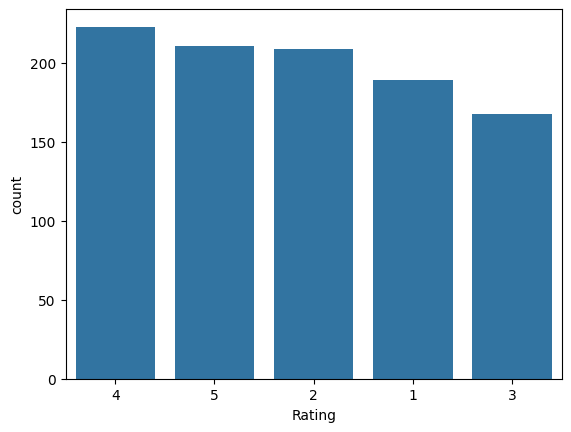

In [5]:
sns.countplot(data=data,
              x='Rating',order=data.Rating.value_counts().index)

In [6]:
# rating label(final)
pos_neg = []
for i in range(len(data['Rating'])):
    if data['Rating'][i] >= 5:
        pos_neg.append(1)
    else:
        pos_neg.append(0)

data['label'] = pos_neg

In [7]:
from tqdm import tqdm
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

def preprocess_text(text_data):
    preprocessed_text = []

    for sentence in tqdm(text_data):
        # Removing punctuations
        sentence = re.sub(r'[^\w\s]', '', sentence)

        # Converting lowercase and removing stopwords
        preprocessed_text.append(' '.join(token.lower()
                                          for token in nltk.word_tokenize(sentence)
                                          if token.lower() not in stopwords.words('english')))

    return preprocessed_text

preprocessed_review = preprocess_text(data['Review_Text'].astype(str).values)
data['Review_Text'] = preprocessed_review

preprocessed_review = preprocess_text(data['Review_Text'].astype(str).values)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
100%|██████████| 1000/1000 [00:00<00:00, 1568.14it/s]


In [8]:
data.head()

,Review_Text,Rating,label
0,mixed feelings experience,4,0
1,staff caring attentive couldnt happier,5,1
2,mixed feelings experience,5,1
3,mixed feelings experience,5,1
4,healthcare provider excellent great experience,3,0


In [9]:
data["label"].value_counts()

0    789
1    211
Name: label, dtype: int64

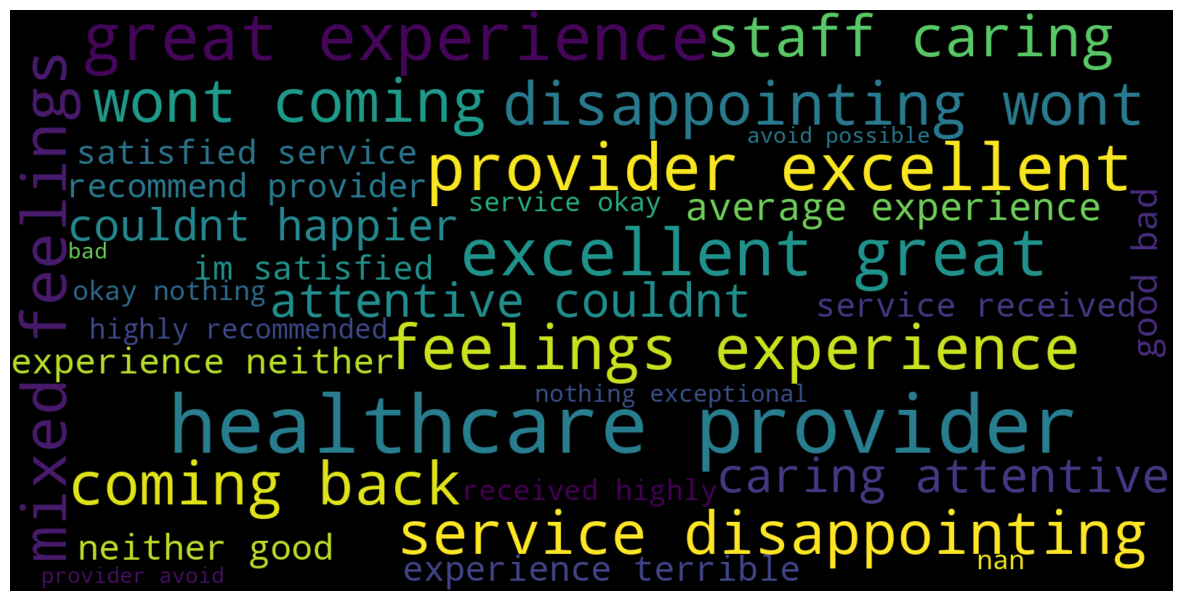

In [10]:

consolidated = ' '.join(
    word for word in data['Review_Text'][data['label'] == 1].astype(str))
wordCloud = WordCloud(width=1600, height=800,
                      random_state=21, max_font_size=110)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:

cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(data['Review_Text'] ).toarray()

In [12]:
X

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.4472136, 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.4472136, 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]])

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, data['label'],
                                                    test_size=0.33,
                                                    stratify=data['label'],
                                                    random_state = 42)

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score  # Add this import statement

model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

# Testing the model
pred = model.predict(X_train)
print(accuracy_score(y_train, pred))


0.7895522388059701


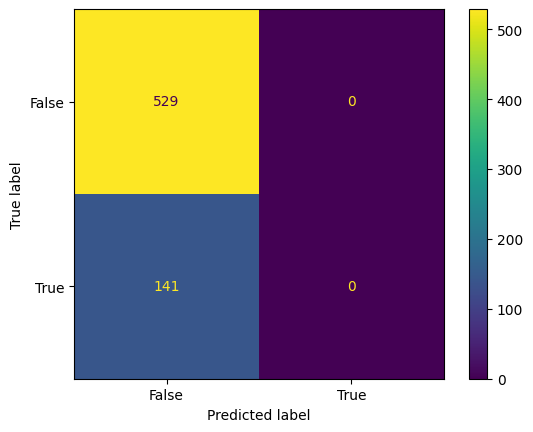

In [15]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix  # Add this import statement
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ... (Your previous code)

cm = confusion_matrix(y_train, pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])

cm_display.plot()
plt.show()


In [16]:
data

,Review_Text,Rating,label
0,mixed feelings experience,4,0
1,staff caring attentive couldnt happier,5,1
2,mixed feelings experience,5,1
3,mixed feelings experience,5,1
4,healthcare provider excellent great experience,3,0
...,...,...,...
995,experience terrible would recommend provider,5,1
996,service disappointing wont coming back,4,0
997,service okay nothing exceptional,3,0
998,mixed feelings experience,5,1


In [ ]:
#data.to_csv('output_file.csv', index=False)

In [ ]:
"""
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, data['label'],
                                                    test_size=0.33,
                                                    stratify=data['label'],
                                                    random_state = 42)

# Load Iris dataset
iris = load_iris()


# Create stratified sampling object
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)


# Split dataset into training and test sets using stratified sampling
for train_index, test_index in strat_split.split(iris.data, iris.target):
    X_train, X_test = iris.data[train_index], iris.data[test_index]
    y_train, y_test = iris.target[train_index], iris.target[test_index]


# Train logistic regression model on training set
clf = LogisticRegression().fit(X_train, y_train)


# Evaluate model on test set
score = clf.score(X_test, y_test)
print(f"Accuracy: {score:.2f}")
"""

Accuracy: 0.97


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Assuming you have X and data['label'] as your features and labels
X_train, X_test, y_train, y_test = train_test_split(X, data['label'],
                                                    test_size=0.33,
                                                    stratify=data['label'],
                                                    random_state=42)

# Train logistic regression model on training set
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

# Evaluate model on test set
score = clf.score(X_test, y_test)
print(f"Accuracy: {score:.2f}")


Accuracy: 0.79


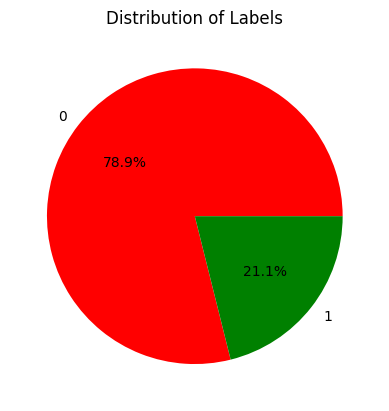

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with a column named 'Label'
labels_count = data['label'].value_counts()

# Plotting a pie chart
plt.pie(labels_count, labels=labels_count.index, autopct='%1.1f%%', colors=['red', 'green'])
plt.title('Distribution of Labels')
plt.show()

In [ ]:
# rating label(final)
pos_neg = []
for i in range(len(data['Rating'])):
    if (data['Rating'][i] == 5) or (data['Rating'][i] == 4):
        pos_neg.append(1)
    elif data['Rating'][i] == 3:
        pos_neg.append(0)
    elif (data['Rating'][i] == 1) or (data['Rating'][i] == 2):
        pos_neg.append(-1)

data['label'] = pos_neg

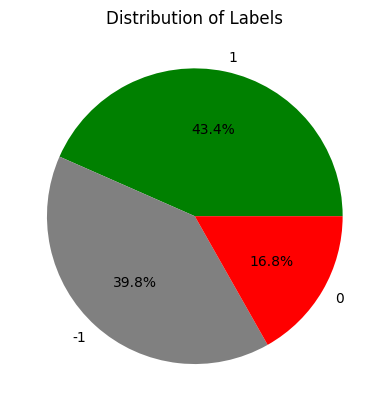

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with a column named 'Label'
labels_count = data['label'].value_counts()

# Plotting a pie chart
plt.pie(labels_count, labels=labels_count.index, autopct='%1.1f%%', colors=['green', 'grey', 'red'])
plt.title('Distribution of Labels')
plt.show()
